In [122]:
# Bring in each of the data sets and read them into a pandas dataframe, testing each one to make sure it works.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_excel(r"C:\Users\ryanm\Desktop\significant-volcanic-eruption-database.xlsx")
df2 = pd.read_csv(r"C:\Users\ryanm\Desktop\volcano.csv")
df3 = pd.read_csv(r"C:\Users\ryanm\Desktop\eruptions.csv")

# Print the column names for each data set to see what we will need and what commonalities exist between datasets.
df1.columns
df_sig = df1[["Year", "Flag Tsunami", "Flag Earthquake", "Volcano Name", "Country", "Elevation", "Volcano Type", "Volcanic Explosivity Index"]]
df_sig.head()

df2.columns
df_vol = df2[["volcano_name", "primary_volcano_type", "last_eruption_year", "country", "latitude", "longitude", "tectonic_settings", "major_rock_1"]]
df_vol.head()

df3.columns
df_erupt = df3[["volcano_name", "eruption_category", "vei", "latitude", "longitude"]]
df_erupt.head()

# Rename columns as necessary to make them easier to work with and make similar/same as others in the datasets.
df_sig = df_sig.rename(columns={"Year" : "year", "Flag Tsunami" : "tsunami", "Flag Earthquake" : "earthquake", "Volcano Name" : "volcano_name", "Country" : "country", "Elevation" : "elevation", "Volcano Type" : "volcano_type", "Volcanic Explosivity Index" : "VEI"})
df_vol = df_vol.rename(columns={"primary_volcano_type" : "volcano_type", "last_eruption_year" : "year", "latitude" : "lat", "longitude" : "lon", "tectonic_settings" : "tectonic_setting", "major_rock_1" : "rock_type"})
df_erupt = df_erupt.rename(columns={"eruption_category" : "eruption_type", "vei" : "VEI", "latitude" : "lat", "longitude" : "lon"})

# Check new .head() to make sure the changes were made.
df_sig.head()
df_vol.head()
df_erupt.head()

,volcano_name,eruption_type,VEI,lat,lon
0,Soputan,Confirmed Eruption,NaN,1.112,124.737
1,San Miguel,Confirmed Eruption,NaN,13.434,-88.269
2,"Fournaise, Piton de la",Confirmed Eruption,NaN,-21.244,55.708
3,Rincon de la Vieja,Confirmed Eruption,NaN,10.830,-85.324
4,Fernandina,Confirmed Eruption,NaN,-0.370,-91.550


In [123]:
# Set + Reset the index for volcano_name for each dataset and view, sorting volcano_name alphabetically.
df_sig.head()
#print(df_sig.index) to confirm index is set to volcano_name
df_sig_ind = df_sig.set_index("volcano_name").sort_index()
df_sig_ind.reset_index(inplace=True)
df_sig_ind.index += 1
df_sig_ind.head(15)

#Repeat for other datasets
df_vol.head()
df_vol_ind = df_vol.set_index("volcano_name").sort_index()
df_vol_ind.reset_index(inplace=True)
df_vol_ind.index += 1
df_vol_ind.head(15)

df_erupt.head()
df_erupt_ind = df_erupt.set_index("volcano_name").sort_index()
df_erupt_ind.reset_index(inplace=True)
df_erupt_ind.index += 1
df_erupt_ind.head(15)



,volcano_name,eruption_type,VEI,lat,lon
1,Abu,Confirmed Eruption,NaN,34.500,131.600
2,Acatenango,Confirmed Eruption,NaN,14.501,-90.876
3,Acatenango,Confirmed Eruption,3.0,14.501,-90.876
4,Acatenango,Confirmed Eruption,2.0,14.501,-90.876
5,Acatenango,Confirmed Eruption,NaN,14.501,-90.876
6,Acatenango,Confirmed Eruption,1.0,14.501,-90.876
7,Acatenango,Confirmed Eruption,NaN,14.501,-90.876
8,Acatenango,Confirmed Eruption,NaN,14.501,-90.876
9,Acatenango,Confirmed Eruption,NaN,14.501,-90.876
10,Acigol-Nevsehir,Confirmed Eruption,NaN,38.537,34.621


In [124]:
# Starting with our volcano_name column, let's count the unique and total values for each dataset.
df_sig_ind["volcano_name"].value_counts()
df_sig_ind["volcano_name"].count()
# 267 unique values, 835 total values
df_vol_ind["volcano_name"].value_counts()
df_vol_ind["volcano_name"].count()
# 954 unique values, 958 total values
df_erupt_ind["volcano_name"].value_counts()
df_erupt_ind["volcano_name"].count()
# 921 unique values, 11178 total values

# Let's take a quick look at info for each dataset to see what we're working with.
df_sig_ind.info()
df_vol_ind.info()
df_erupt_ind.info()

# So the df_erupt_ind dataset has a lot of null values for VEI, which is a problem. Let's see how many null values there are.
df_erupt_ind.isnull().sum()
# Since VEI is a very important column for our analysis, we need to drop the rows with null values.
df_erupt_ind.dropna(subset=["VEI"], inplace=True)
df_erupt_ind.isnull().sum()
# Looks good, down to 8272 rows from 11178 and all rows have a value for VEI. Let's do the same for the other datasets.
df_sig_ind.dropna(subset=["VEI"], inplace=True)
df_sig_ind.isnull().sum()
# We have a lot of null(they are blank in the sheet) values for tsunami and earthquake, however these variables aren't as imperative
# for our analysis so we can leave them as is for now.  Let's see if the data that currently exists can provide some insight when we analyze it.
df_vol_ind.isnull().sum()
# This dataset doesn't include the VEI column, and shows no null values in its data.  We will eventually need to merge this dataset
# with the df_erupt_ind dataset to get the VEI column from matching data and then drop the null values from that dataset.
# But first let's address any data inconsistencies so it makes our pending merge easier.


# Let's start with the df_sig_ind dataset.
df_sig_ind.head()
df_sig_ind["volcano_type"].unique()
#There's two types of submarine volcanoes, so let's combine them into one.
df_sig_ind["volcano_type"].replace({"Submarine volcanoes" : "Submarine volcano"}, inplace=True)
# Let's check to see if it worked.
df_sig_ind["volcano_type"].unique()
# Let's check out our primary VEI column for those scores.
df_sig_ind["VEI"].value_counts()
df_sig_ind.drop(df_sig_ind[df_sig_ind["VEI"] == 0.0].index, inplace=True)
# Great, now on to the others.


df_vol_ind.head(25)
# Looks like we have 3 columns to work on here, volcano_type, tectonic_setting, and rock_type.
df_vol_ind["volcano_type"].unique()
#There's a few we need to edit here, let's get rid of some of those suffixes.
df_vol_ind["volcano_type"] = df_vol_ind["volcano_type"].apply(lambda x: x.replace("(s)", "").replace("(es)", ""))
df_vol_ind["volcano_type"].unique()
df_vol_ind["volcano_type"].value_counts()
# Looks good, let's do the other ones.
df_vol_ind["tectonic_setting"].value_counts()
# Hmm what is that Unknown tectonic setting? Let's see if we can find out.
df_vol_ind[df_vol_ind["tectonic_setting"] == "Unknown"]
# Without a year as well, we can't really do anything with this data. Let's drop it.
df_vol_ind.drop(df_vol_ind[df_vol_ind["tectonic_setting"] == "Unknown"].index, inplace=True)
# Let's check to make sure it worked.
df_vol_ind["tectonic_setting"].value_counts()
# Now let's look at the data format.
df_vol_ind["tectonic_setting"].unique()
# We are not as concerned with the crust suffixes in this project, let's remove the long suffixes and combine the settings to make it easy on us here.
df_vol_ind["tectonic_setting"] = df_vol_ind["tectonic_setting"].apply(lambda x: x.replace(" / Continental crust (>25 km)", "").replace(" / Continental crust (>25 km)", "").replace(" / Intermediate crust (15-25 km)", "").replace(" / Crustal thickness unknown", "").replace(" / Oceanic crust (< 15 km)", "").replace(" / Oceanic crust (< 15 km)", "").replace(" / Intermediate crust (15-25 km)", "").replace(" / Continental crust (>25 km)", "").replace(" / Oceanic crust (< 15 km)", "").replace(" / Intermediate crust (15-25 km)", ""))
df_vol_ind["tectonic_setting"].unique()
# Looks good, let's do the last one for this dataset.
df_vol_ind["rock_type"].unique()
# This column is similar to the tectonic_setting column in its format inconsistencies, let's write another lambda function to clean it up.
df_vol_ind["rock_type"] = df_vol_ind["rock_type"].apply(lambda x: x.replace(" / Basaltic Andesite", "").replace(" / Picro-Basalt", "").replace(" / Trachydacite", "").replace(" /  Tephri-phonolite", "").replace(" / Basaltic Trachyandesite", "").replace(" / Tephrite Basanite", ""))
df_vol_ind["rock_type"].unique()
# Let's check out a quick .head() to make sure everything looks good.
df_vol_ind.head(25)
# We probably shouldn't have Unknown years in our dataset, let's see how many there are.
df_vol_ind["year"].value_counts()
# Even though there's quite a few let's drop them because we need the year for our analysis.
df_vol_ind.drop(df_vol_ind[df_vol_ind["year"] == "Unknown"].index, inplace=True)
df_vol_ind.head(25)


df_erupt_ind["eruption_type"].unique()
# Uncertain Eruption doesn't sound good for our data, if it didn't happen we don't want it in our dataset.
df_erupt_ind["eruption_type"].value_counts()
# Again quite a few but let's drop them as they are not useful for our analysis.
df_erupt_ind.drop(df_erupt_ind[df_erupt_ind["eruption_type"] == "Uncertain Eruption"].index, inplace=True)
# Now that the column has been normalized with its data, let's go ahead and drop the column as we don't need it anymore.
df_erupt_ind.drop(columns=["eruption_type"], inplace=True)
df_erupt_ind.head(25)
df_erupt_ind["VEI"].value_counts()
# Let's drop the Unknown VEI values showing a score of 0.0 as they are not useful for our analysis.
df_erupt_ind.drop(df_erupt_ind[df_erupt_ind["VEI"] == 0.0].index, inplace=True)
df_erupt_ind["VEI"].value_counts()
df_erupt_ind.head(25)
# After deliberating about it, let's drop the tsunami and earthquake columns from the df_sig_ind dataset.  There is just not enough information to make them useful for our analysis.
df_sig_ind.drop(columns=["tsunami", "earthquake"], inplace=True)



# Everything looks good, let's move on to merging the datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 1 to 835
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volcano_name  835 non-null    object 
 1   year          835 non-null    int64  
 2   tsunami       145 non-null    object 
 3   earthquake    67 non-null     object 
 4   country       835 non-null    object 
 5   elevation     835 non-null    int64  
 6   volcano_type  835 non-null    object 
 7   VEI           659 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 52.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 1 to 958
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volcano_name      958 non-null    object 
 1   volcano_type      958 non-null    object 
 2   year              958 non-null    object 
 3   country           958 non-null    object 
 4   lat         

In [125]:
# Before we start merging, let's check the datatypes of each dataset to make sure they are compatible for merging.
df_vol_ind.dtypes
df_sig_ind.dtypes
df_erupt_ind.dtypes
# To make reading and processing some of these categories later, let's change the datatypes of the volcano_type(s), tectonic_setting, rock_type, and year columns to categorical data.
# Also as a good measure change both VEI columns to int64 datatypes.
df_vol_ind["volcano_type"] = df_vol_ind["volcano_type"].astype("category")
df_vol_ind["tectonic_setting"] = df_vol_ind["tectonic_setting"].astype("category")
df_vol_ind["rock_type"] = df_vol_ind["rock_type"].astype("category")
df_sig_ind["volcano_type"] = df_sig_ind["volcano_type"].astype("category")
df_sig_ind["VEI"] = df_sig_ind["VEI"].astype("int64")
df_erupt_ind["VEI"] = df_erupt_ind["VEI"].astype("int64")
df_vol_ind["year"] = df_vol_ind["year"].astype("int64")
df_sig_ind["year"] = df_sig_ind["year"].astype("int64")
# Check dtypes for each dataset to make sure the changes were made.
df_vol_ind.dtypes
df_sig_ind.dtypes
df_erupt_ind.dtypes
# The df_erupt_ind has a lot of duplicate rows, let's drop them to make our merge easier.  We will keep the first instance of each duplicate row.
df_erupt_ind.drop_duplicates(keep="first", inplace=True)
# Let's also drop duplicates from the df_sig_ind dataset, as we don't want to merge duplicate rows.
df_sig_ind.drop_duplicates(keep="first", inplace=True)
# Let's also while we are at it remove whitespaces from the volcano_name column in each dataset.
df_vol_ind.head(25)
df_vol_ind['volcano_name'] = df_vol_ind['volcano_name'].str.strip()
df_vol_ind.index += 1
df_vol_ind.head(25)
# Now for the others, checking for other potential errors as we go.
df_sig_ind.head(25)
df_sig_ind['volcano_name'] = df_sig_ind['volcano_name'].str.strip()
df_sig_ind.index += 1
df_sig_ind.head(25)
# We will reset the index(es) after the merge is complete, so not worried at this time about the gaps in the index.
df_erupt_ind.head()
# As an aside task we will drop matching duplicated rows from this dataset, to make our forthcoming merge easier.
df_erupt_ind.drop_duplicates(keep="first", inplace=True)
df_erupt_ind.head()
df_erupt_ind['volcano_name'] = df_erupt_ind['volcano_name'].str.strip()
df_erupt_ind.index += 1
df_erupt_ind.head()

# Let's start with the df_vol_ind dataset and merge it with the df_sig_ind dataset.
df_volsig_pre = pd.merge(df_vol_ind, df_sig_ind, on=["volcano_name", "volcano_type", "year", "country"], how="outer")
df_volsig_pre.head(25)
df_volsig_pre.count()
# Looks good, our min count value is 614. Let's bring in the df_erupt_ind dataset and merge it with the df_volsig_pre dataset to get some more.
df_volsigeru_pre = pd.merge(df_volsig_pre, df_erupt_ind, on=["volcano_name", "lat", "lon", "VEI"], how="outer")
df_volsigeru_pre.head(25)
df_volsigeru_pre.count()
# Both datasets are now merged, let's reset the index and check for any null values.
df_volsigeru_pre.reset_index(inplace=True)
df_volsigeru_pre.index += 1
df_volsigeru_pre.head(25)
df_volsigeru_pre = df_volsigeru_pre.drop(columns=["index"])
df_volsigeru_pre.head(25)

# Thinking ahead, let's add dummy variables for the categorical data in our dataset and make sure the data types are int64.
#dummy_df = pd.get_dummies(df_volsigeru_pre[["volcano_type", "tectonic_setting", "rock_type"]], dummy_na=False, dtype="int64")
df_volsigeru_pre = pd.concat([df_volsigeru_pre, dummy_df], axis=1)


df_volsigeru_pre.head(25)
# Let's check for null values.
#df_volsigeru_pre.count()
#df_volsigeru_pre.isnull().sum()
# There is a decision to make here.  We have a lot of null values in our merged dataset, but we also have a lot of data.  We can drop the null values and lose a lot of data, or we can keep the null values and work with what we have.  I think we should keep the null values and work with what we have, as we have a lot of data to work with.
# Let's work on paring down the null values and making our dataset easier to work with.
df_volsigeru_pre["volcano_name"].drop_duplicates()
# For a minute we are going to make a separate dataset(s) to see how it looks, as we have conflicting data at the moment.
df_volsigeru_one = df_volsigeru_pre.drop(columns=["elevation", "VEI"], axis=1)
df_volsigeru_one.head(25)
df_volsigeru_one.drop_duplicates(keep="first", inplace=True)
df_volsigeru_one.replace('', np.nan, inplace=True)
df_volsigeru_one.dropna(inplace=True)
df_volsigeru_one.head(25)
df_volsigeru_one.count()
# There, uniformity in the dataset.  Let's do the same for the other dataset that we will potentially use.
df_volsigeru_two = df_volsigeru_pre.drop(columns=["lat", "lon", "tectonic_setting", "rock_type"], axis=1)
df_volsigeru_two.head(25)
df_volsigeru_two.drop_duplicates(keep="first", inplace=True)
df_volsigeru_two.dropna(inplace=True)
df_volsigeru_two.head(25)
df_volsigeru_two.count()
# Uniformity established again, however we need to remove the dummy columns we don't need for this particular dataset.
df_volsigeru_two = df_volsigeru_two.drop(columns=["tectonic_setting_Intraplate", "tectonic_setting_Rift zone", "tectonic_setting_Subduction zone", "rock_type_Andesite", "rock_type_Basalt", "rock_type_Dacite", "rock_type_Foidite", "rock_type_Phono-tephrite", "rock_type_Phonolite", "rock_type_Rhyolite", "rock_type_Trachyandesite", "rock_type_Trachybasalt", "rock_type_Trachyte"], axis=1)
df_volsigeru_two.head()
df_volsigeru_one.head()
# The first set we created from df_volsigeru_pre will be used for our analysis, as it has the most complete data. We lost our VEI and elevation columns, but we have a lot of data to work with and we can still make some good analysis from it.
# Let's reset the index and check for any null values for good measure.
df_volsigeru_one.reset_index(inplace=True)
df_volsigeru_one.index += 1
df_volsigeru_one.head()
df_volsigeru_one.drop(columns=["index"], inplace=True)
df_volsigeru_one.head()
df_volsigeru_one.isnull().sum()
# Looks good, let's move on to the next step.
# Before we move on, let's save our dataset to a .csv file so we can use it in our analysis.
df_volsigeru_one.to_csv(r"C:\Users\ryanm\Desktop\Capstone2project-maindata.csv", index=False)
# Great, let's save and and push to our repo.  We will use this dataset in our analysis.
# Do we want/need to set up dummy columns for country too? Let's explore real quick.
df_volsigeru_one["country"].value_counts()
df_volsigeru_one["volcano_type"].count()
# Looks like I forgot a small errouneous entry in the volcano_type column, let's fix that.
(df_volsigeru_one["volcano_type"] == "Stratovolcano?").sum()
df_volsigeru_one.drop(df_volsigeru_one[df_volsigeru_one["volcano_type"] == "Stratovolcano?"].index, inplace=True)
df_volsigeru_one["volcano_type"].count()
# Let's do a quick index reset and push again.
df_volsigeru_one.reset_index(inplace=True)
df_volsigeru_one.index += 1
df_volsigeru_one.drop(columns=["index"], inplace=True)
df_volsigeru_one.head(25)

# Good, let's save and push again.
df_volsigeru_one.to_csv(r"C:\Users\ryanm\Desktop\Capstone2project-maindata.csv", index=False)

df_volsigeru_one['volcano_type'].value_counts()
# Removing redundant dummy columns that have no attributable value sin them.
df_volsigeru_one = df_volsigeru_one.loc[:, (df_volsigeru_one != 0).any(axis=0)]
df_volsigeru_one.shape
df_volsigeru_one.dtypes
# We no longer need the main tectonic_setting ,rock_type, and volcano_type columns as we have converted them to dummy columns.  As cat data they will interfere with out plotting.  Let's remove.
df_volsigeru_one.drop(['tectonic_setting', 'rock_type', 'volcano_type'], axis=1, inplace=True)
df_volsigeru_one.dtypes
df_volsigeru_one[['volcano_name', 'country']] = df_volsigeru_one[['volcano_name', 'country']].astype('category')
df = df_volsigeru_one

In [126]:
# Let's clean this up just a bit more before we plot, still see some more we can do.
df_merge = pd.merge(df, df_erupt_ind, on='volcano_name', how='inner')
df_merge.drop_duplicates(subset = ['volcano_name', 'year'], inplace=True)
# Reset the index
df_merge.reset_index(drop=True, inplace=True)
# Rename the remaining VEI column to VEI
df_main = df_merge
df_main.dtypes
df_main['volcano_name'] = df_main['volcano_name'].astype('category')
df_main.drop(columns = ['lat_y', 'lon_y'], axis = 1, inplace=True)
df_main = df_main.rename(columns = {'lat_x' : 'lat', 'lon_x' : 'lon' })
df_main.dtypes


volcano_name                        category
year                                 float64
country                             category
lat                                  float64
lon                                  float64
volcano_type_Caldera                   int64
volcano_type_Complex                   int64
volcano_type_Compound                  int64
volcano_type_Crater rows               int64
volcano_type_Fissure vent              int64
volcano_type_Lava cone                 int64
volcano_type_Lava dome                 int64
volcano_type_Maar                      int64
volcano_type_Pyroclastic cone          int64
volcano_type_Pyroclastic shield        int64
volcano_type_Shield                    int64
volcano_type_Stratovolcano             int64
volcano_type_Subglacial                int64
volcano_type_Submarine                 int64
volcano_type_Tuff cone                 int64
volcano_type_Volcanic field            int64
tectonic_setting_Intraplate            int64
tectonic_s

In [127]:
# Alright now that we have our VEI col let's look at some intro plots (finally).
sns.pairplot(df_main)
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


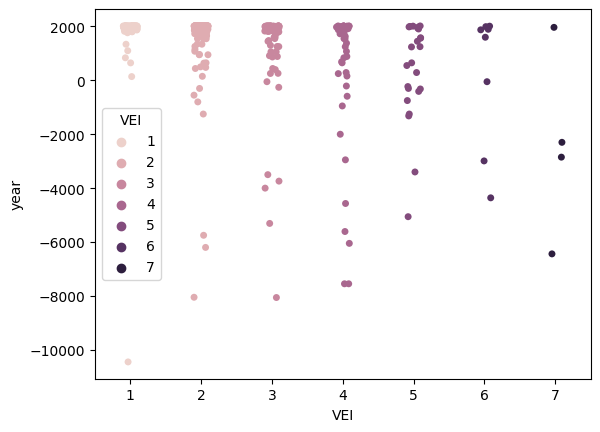

In [128]:
# Nothing of note in the pairplot, let's look at a stripplot.
sns.stripplot(x = 'VEI', y = 'year', data = df_main, hue = 'VEI')
plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


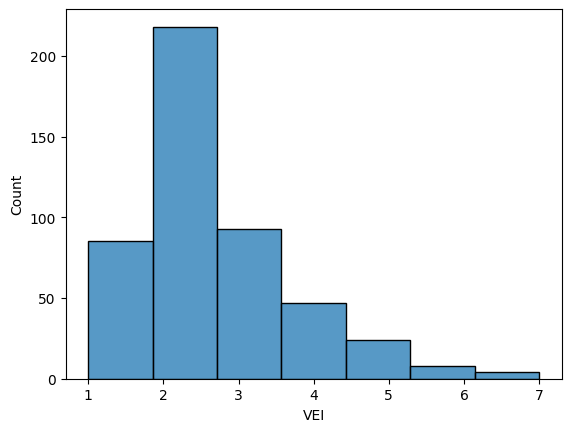

In [129]:
# Let's see about VEI (our main dep var here we are looking at) in and of itself.
sns.histplot(df_main['VEI'], bins = 7)
plt.show()




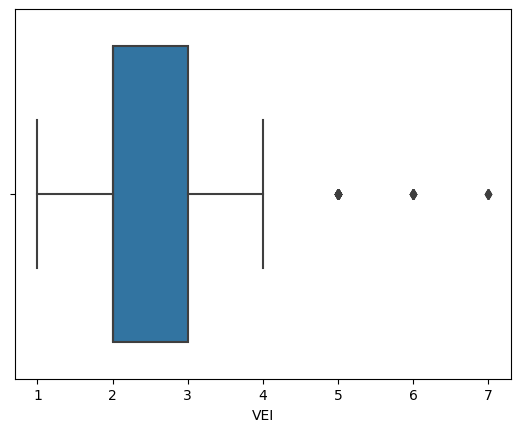

In [130]:
# Now let's look at how the VEI shapes up with some of those type columns we created.
# Let's make a separate var for this, we may need to use again.
#volcano_type_columns = df_main.filter(like = 'volcano_type_').columns
#vei_voltype = df_main.groupby(volcano_type_columns)['VEI'].sum()
sns.boxplot(x = 'VEI', data = df_main)
plt.show()












